In [1]:
import requests
import pandas as pd
import numpy as np

import datetime

%matplotlib notebook
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

In [2]:
# Get Data function
def getBuoyData(stationId):
    # Downloading the data from the URL
    url = 'https://ndbc.noaa.gov/data/realtime2/' + str(stationId) + '.dart'
    req = requests.get(url)    
    dataBuoy = req.text.split('\n')
    
    # Saving the data as a list of list
    lolDataBuoy = []
    for line in dataBuoy[:-1]:
        if line[0] == '#':
            continue
        else:
            lolDataBuoy.append(line.split(' '))
    
    # Saved as a Pandas dataframe
    df_buoy = pd.DataFrame(lolDataBuoy)
    df_buoy.columns = ['year', 'month', 'day', 'hour', 'minute', 'second', 'type', 'height']
    
    # Converting to datetime
    df_datetime = pd.to_datetime(df_buoy[['year', 'month', 'day', 'hour', 'minute', 'second']]).to_frame()
    df_datetime.columns = ['datetime']

    # Rejoining the datetime dataframe with original data
    df_data = df_buoy[['type', 'height']]
    df_buoy = df_datetime.join(df_data)
    
    # Converting from string to numeric
    df_buoy['height'] = df_buoy['height'].astype(float)
    df_buoy['type'] = df_buoy['type'].astype(int)

    return df_buoy

In [3]:
# StationID
station = 56003

df_buoy = getBuoyData(station)
df_buoy.head(5)

,datetime,type,height
0,2020-06-15 00:00:00,1,5658.729
1,2020-06-14 23:45:00,1,5658.775
2,2020-06-14 23:30:00,1,5658.819
3,2020-06-14 23:15:00,1,5658.861
4,2020-06-14 23:00:00,1,5658.898


In [4]:
def plotFigure(x_act, y_act):    
    figure = plt.figure()
    axes1 = figure.add_subplot(111)

    # Plot the height against timestamp
    axes1.plot(x_act, y_act, marker = '.', color = 'red', 
                  label = 'actual')
    axes1.set_ylabel('height (m)')
    axes1.set_xlabel('timestamp')
    axes1.legend(loc = 'upper right')
    axes1.set_xlim(x_act[-1], x_act[0])
    
    plt.gcf().autofmt_xdate()
    plt.show()

Mean sea level is 5658.46 m


<IPython.core.display.Javascript object>


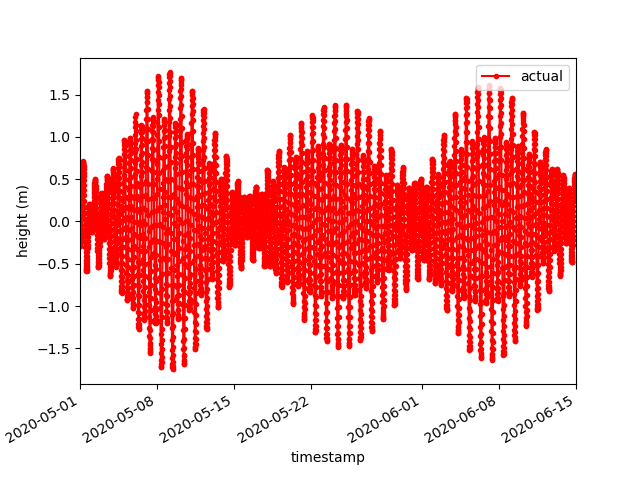

In [5]:
arrayDatetime = np.array(df_buoy['datetime'].to_list())
arrayRawHeight = np.array(df_buoy['height'].to_list())

averageData = np.average(arrayRawHeight)
print("Mean sea level is %.2f m" % averageData)

arrayHeight = np.subtract(arrayRawHeight, averageData)

plotFigure(arrayDatetime, arrayHeight)